In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
import pathlib
from PIL import Image
from numpy import asarray
#import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, metrics
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Activation, MaxPool2D, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import KFold, StratifiedKFold
import sklearn.metrics as metrics
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from tensorflow.keras.applications import (vgg16)

In [3]:
folder_path = '/home/jaliyah/data'
biofilm_full_path = os.path.join(folder_path, 'biofilm')
nonbio_full_path = os.path.join(folder_path, 'single_cell')
my_bio_files_list = []
my_non_files_list = []

In [4]:
for file in os.listdir(biofilm_full_path):
    my_bio_files_list.append(os.path.join(biofilm_full_path,file))

In [5]:
img_width = 224
img_height = 224

In [6]:
total_img_bio = np.zeros((276,img_width,img_height,3), dtype=np.int16)
biofilm_label= np.ones(276)
print(total_img_bio.shape)
for (i,file) in enumerate(my_bio_files_list):
    img = cv2.imread(file)
   # print(file)
   # plt.imshow(img)
   # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img_1 = img.resize(img_width,img_height,3)
    total_img_bio[i] = img
   # print(biofilm_label[i])

(276, 224, 224, 3)


In [7]:
for file in os.listdir(nonbio_full_path):
    my_non_files_list.append(os.path.join(nonbio_full_path,file))
#print((my_non_files_list[63]))

In [8]:
total_img_non = np.zeros((190,img_width,img_height,3), dtype=np.int16)
print(total_img_non.shape)
non_biofilm_label= np.zeros(190)

for (i,file) in enumerate(my_non_files_list):
    img = cv2.imread(file)
   # print(os.path.exists(file))
    #print(file)
    img_1 = img.resize(img_width,img_height,3)
    #print(file)
    #print (img.shape)
    #print(img)
    total_img_non[i] = img

(190, 224, 224, 3)


In [9]:
import random
total = total_img_bio.shape[0]
size = int(total * .20)
test_bio = random.sample(range(0, total), size)
np.unique(test_bio).shape

(55,)

In [10]:
test_bio_img = total_img_bio[test_bio]

In [11]:
test_bio_lbl = biofilm_label[test_bio]

In [12]:
total = total_img_non.shape[0]
size = int(total * .20)
test_non = random.sample(range(0, total), size)
np.unique(test_non).shape

(38,)

In [13]:
test_non_img = total_img_non[test_non]
test_non_lbl = non_biofilm_label[test_non]

In [14]:
total_test_img = np.concatenate([test_bio_img,test_non_img])
total_test_lbl = np.concatenate([test_bio_lbl,test_non_lbl])

In [15]:
a = list(range(total_img_bio.shape[0]))
#gives us total 2225 to use for train/vali
train_vali_total = (set(a) -(set(test_bio)))
len_train_vali_total = (len(train_vali_total))
print(len_train_vali_total)
size = int(len_train_vali_total * .10)
#size
vail_bio = random.sample(range(0, len_train_vali_total), size)
np.unique(vail_bio).shape
vail_bio_img = total_img_bio[vail_bio]
vail_bio_lbl = biofilm_label[vail_bio]

221


In [16]:
a = list(range(len_train_vali_total))
train_total = (set(a) -(set(vail_bio)))
train_bio = list(train_total)
train_bio_img = total_img_bio[train_bio]
train_bio_lbl = biofilm_label[train_bio]
train_bio_img.shape
x = np.array(train_bio)
print(np.unique(x).shape)

(199,)


In [17]:
a = list(range(total_img_non.shape[0]))
#gives us total 4897 to use for train/vali
train_vali_non_total = (set(a) -(set(test_non)))
len_train_vali_non_total = (len(train_vali_non_total))
print(len_train_vali_non_total)
size = int(len_train_vali_non_total * .10)
print(size)
vail_non = random.sample(range(0, len_train_vali_non_total), size)
vail_non_img = total_img_non[vail_non]
vail_non_lbl = non_biofilm_label[vail_non]

152
15


In [18]:
a = list(range(len_train_vali_non_total))
train_non_total = (set(a) -(set(vail_non)))
train_non = list(train_non_total)
train_non_img = total_img_non[train_non]
train_non_lbl = non_biofilm_label[train_non]

In [19]:
total_vali_img = np.concatenate([vail_bio_img,vail_non_img])
total_vali_lbl = np.concatenate([vail_bio_lbl,vail_non_lbl])

In [20]:
total_train_img = np.concatenate([train_bio_img,train_non_img])
total_train_lbl = np.concatenate([train_bio_lbl,train_non_lbl])

In [21]:
vgg_model = vgg16.VGG16(weights='imagenet')

2022-08-01 16:57:31.913753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 16:57:31.941955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 16:57:31.942204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 16:57:31.942926: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [22]:
model = keras.models.Sequential(vgg_model.layers[:-1])
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [23]:
vgg_model_clone = keras.models.clone_model(vgg_model)
vgg_model_clone.set_weights(vgg_model.get_weights())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [24]:
vgg_model_clone.layers[:8]

In [25]:
for layer in model.layers[:-1]:
    layer.trainable = False

In [26]:
for layer in model.layers[0:8]:
    layer.trainable = True
for layer in model.layers[8:24]:
    layer.trainable = False
for layer in model.layers[-1:]:
    layer.trainable = True
#optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-3
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(total_train_img, total_train_lbl, epochs=5,
 validation_data=(total_vali_img, total_vali_lbl))
model.summary()

Epoch 1/5


2022-08-01 16:57:48.767500: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300
2022-08-01 16:57:49.766895: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-08-01 16:57:49.768947: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-08-01 16:57:49.768958: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-08-01 16:57:49.769015: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

11/11 [==============================] - 6s 224ms/step - loss: 0.2650 - accuracy: 0.8988 - val_loss: 0.1222 - val_accuracy: 0.9730
Epoch 2/5
11/11 [==============================] - 1s 93ms/step - loss: 0.1906 - accuracy: 0.9345 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 1s 91ms/step - loss: 0.1364 - accuracy: 0.9524 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 4/5
11/11 [==============================] - 1s 93ms/step - loss: 0.1043 - accuracy: 0.9643 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 1s 92ms/step - loss: 0.0774 - accuracy: 0.9673 - val_loss: 0.0135 - val_accuracy: 1.0000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)   

In [35]:
F1 = 2 * (0.9322034120559692 * 1.0) / (0.9322034120559692 + 1.0)
print(F1)
test_datagen = keras.preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow(total_test_img,total_test_lbl)
model.evaluate(test_generator)

0.9649122926080068
3/3 [==============================] - 0s 30ms/step - loss: 0.1087 - accuracy: 0.9570 - precision_1: 0.9322 - recall_1: 1.0000


[0.10865256935358047, 0.9569892287254333, 0.9322034120559692, 1.0]

In [28]:
for layer in model.layers[0:]:
    layer.trainable = True


In [28]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator()

In [29]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [31]:
X =  np.concatenate([total_train_img,total_vali_img])
y = np.concatenate([total_train_lbl,total_vali_lbl])

VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models/'
fold_var = 1

kfold = KFold(n_splits=5, shuffle=True) 
# enumerate splits
for train_index, valid_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
    valid_generator = train_datagen.flow(X_valid, y_valid, batch_size=32, shuffle=True)
    
    model = keras.models.Sequential(vgg_model.layers[:-1])
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    for layer in model.layers[0:8]:
        layer.trainable = True
    for layer in model.layers[8:24]:
        layer.trainable = False
    for layer in model.layers[-1:]:
        layer.trainable = True
    model.compile(loss='binary_crossentropy', 
       optimizer=tf.optimizers.Adam(learning_rate=0.00001),  
       metrics=['accuracy',tf.metrics.Precision(),tf.metrics.Recall()])
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))  
    my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1),
    tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
                                    monitor='val_accuracy', verbose=1, 
                                    save_best_only=True, mode='max')
    ]

    model.fit(train_generator, validation_data=valid_generator,
                callbacks=my_callbacks, epochs=50)
    model.load_weights("saved_models/model_"+str(fold_var)+".h5")

    results = model.evaluate(valid_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    tf.keras.backend.clear_session()

    fold_var += 1

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.5863 - accuracy: 0.6141 - precision_1: 0.5979 - recall_1: 0.9882

2022-08-01 17:00:18.799356: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24662507520 exceeds 10% of free system memory.



Epoch 00001: val_accuracy improved from -inf to 0.82667, saving model to saved_models/model_1.h5
10/10 [==============================] - 12s 1s/step - loss: 0.5863 - accuracy: 0.6141 - precision_1: 0.5979 - recall_1: 0.9882 - val_loss: 0.3498 - val_accuracy: 0.8267 - val_precision_1: 0.7969 - val_recall_1: 1.0000
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.3334 - accuracy: 0.9060 - precision_1: 0.8586 - recall_1: 1.0000

2022-08-01 17:00:29.860673: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24662507520 exceeds 10% of free system memory.



Epoch 00002: val_accuracy improved from 0.82667 to 0.97333, saving model to saved_models/model_1.h5
10/10 [==============================] - 11s 1s/step - loss: 0.3334 - accuracy: 0.9060 - precision_1: 0.8586 - recall_1: 1.0000 - val_loss: 0.2419 - val_accuracy: 0.9733 - val_precision_1: 1.0000 - val_recall_1: 0.9608
Epoch 3/50
 9/10 [==========================>...] - ETA: 0s - loss: 0.2220 - accuracy: 0.9826 - precision_1: 0.9760 - recall_1: 0.9939

2022-08-01 17:00:40.806350: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24662507520 exceeds 10% of free system memory.



Epoch 00003: val_accuracy did not improve from 0.97333
10/10 [==============================] - 9s 922ms/step - loss: 0.2263 - accuracy: 0.9765 - precision_1: 0.9711 - recall_1: 0.9882 - val_loss: 0.2348 - val_accuracy: 0.9333 - val_precision_1: 0.9792 - val_recall_1: 0.9216
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.1871 - accuracy: 0.9732 - precision_1: 0.9709 - recall_1: 0.9824
Epoch 00004: val_accuracy did not improve from 0.97333
10/10 [==============================] - 9s 943ms/step - loss: 0.1871 - accuracy: 0.9732 - precision_1: 0.9709 - recall_1: 0.9824 - val_loss: 0.1935 - val_accuracy: 0.9467 - val_precision_1: 1.0000 - val_recall_1: 0.9216
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.9765 - precision_1: 0.9766 - recall_1: 0.9824
Epoch 00005: val_accuracy did not improve from 0.97333
10/10 [==============================] - 9s 945ms/step - loss: 0.1378 - accuracy: 0.9765 - precision_1: 0.9766 - recall_1:

KeyboardInterrupt: 

In [32]:
test_generator = test_datagen.flow(total_test_img,total_test_lbl)
loss, accuracy,Precision, Recall = model.evaluate(test_generator)

3/3 [==============================] - 0s 31ms/step - loss: 0.7602 - accuracy: 0.4516 - precision: 0.5909 - recall: 0.2364


In [33]:
np.mean(VALIDATION_ACCURACY)

0.7498018026351929

In [34]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)


0 block1_conv1 (None, 224, 224, 64)
1 block1_conv2 (None, 224, 224, 64)
3 block2_conv1 (None, 112, 112, 128)
4 block2_conv2 (None, 112, 112, 128)
6 block3_conv1 (None, 56, 56, 256)
7 block3_conv2 (None, 56, 56, 256)
8 block3_conv3 (None, 56, 56, 256)
10 block4_conv1 (None, 28, 28, 512)
11 block4_conv2 (None, 28, 28, 512)
12 block4_conv3 (None, 28, 28, 512)
14 block5_conv1 (None, 14, 14, 512)
15 block5_conv2 (None, 14, 14, 512)
16 block5_conv3 (None, 14, 14, 512)


In [35]:
ixs = [3, 7, 9, 13, 15]
outputs = [model.layers[i+1].output for i in ixs]
model1 = tf.keras.Model(inputs=model.inputs, outputs=outputs)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [51]:
test_dir = pathlib.Path('/home/jaliyah/data/single_cell//')
img_path = os.path.join(test_dir, 'slide eleven (313).jpg')

test_img = keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
print(img_array.shape)
#len(feature_maps)

(1, 224, 224, 3)


In [52]:
feature_maps = model1.predict(img_array)
len(feature_maps)

5

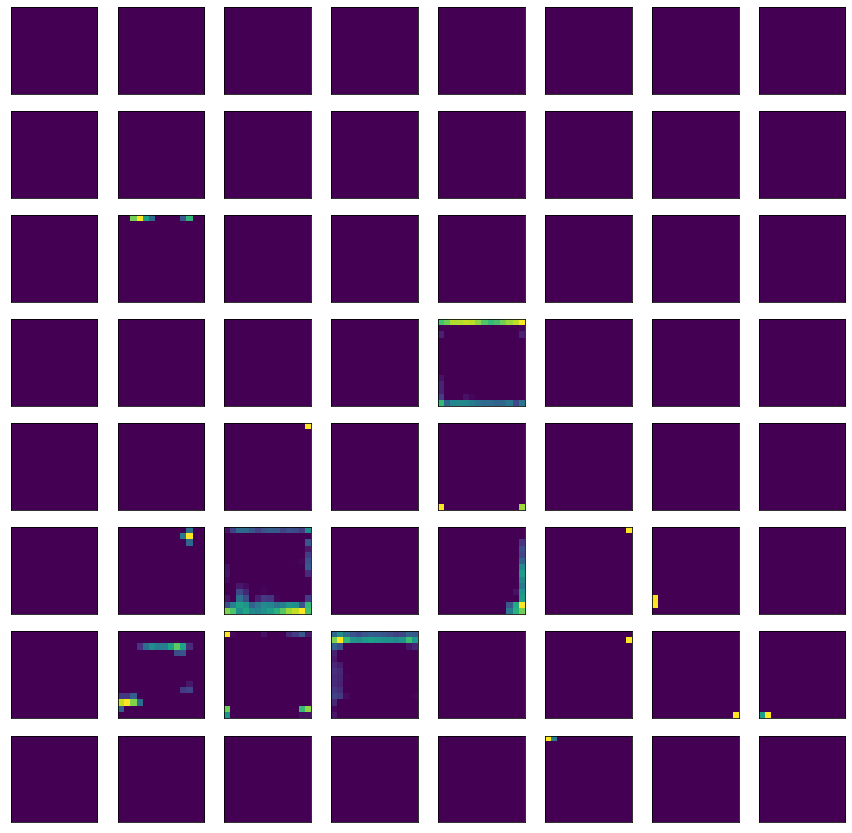

In [58]:
import matplotlib.pyplot as pyplot
square = 8

f = plt.figure(figsize=(15,15))
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(np.squeeze(feature_maps[4])[:, :, ix-1])
        ix += 1
# show the figure
pyplot.show()


In [ ]:
filters, biases = model.layers[3].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
import matplotlib.pyplot as pyplot
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [59]:
test_dir = pathlib.Path('/home/jaliyah/data/single_cell//')
img_path = os.path.join(test_dir, 'slide eleven (313).jpg')

test_img = keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
print(img_array.shape)

(1, 224, 224, 3)


In [60]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [62]:
last_conv_layer_name = 'block2_conv2'
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
plt.matshow(heatmap)
plt.show()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


In [ ]:
save_and_display_gradcam(img_path, heatmap)